# Problem Statement
#### A company aims to enhance its marketing strategies and improve customer satisfaction by implementing a customer segmentation strategy. The objective is to divide our customer base into distinct groups based on their shared characteristics, preferences, and behaviors. By identifying these segments, we can tailor our marketing efforts, product offerings, and customer experiences to better meet the unique needs of each group, ultimately leading to increased customer loyalty, higher conversion rates, and improved revenue.

## Feature Understanding
1. InvoiceNo: A unique identifier for each transaction, helping to track and differentiate individual purchases.


2. StockCode: Represents the code or identifier of the product purchased, aiding in inventory management and order fulfillment.


3. Description: Provides a brief description of the purchased product, assisting in understanding the nature of the items sold.


4. Quantity: Indicates the number of units of a product bought in each transaction, crucial for analyzing purchase volumes and demand patterns.


5. InvoiceDate: Records the date and time of each transaction, enabling temporal analysis to identify trends and seasonal patterns.


6. UnitPrice: Represents the price of a single unit of the product, crucial for calculating total revenue and understanding pricing strategies.


7. CustomerID: A unique identifier for each customer, allowing the grouping of transactions by individual buyers for customer-centric analysis.


8. Country: Records the country where the transaction occurred, essential for analyzing international sales and regional preferences.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
df = pd.read_csv('data.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12-09-2011 12:50,4.95,12680.0,France


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

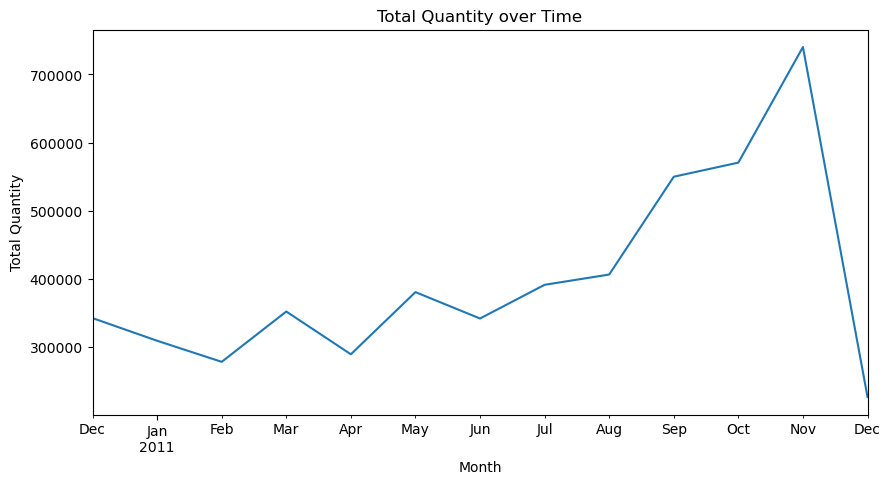

In [8]:
plt.figure(figsize=(10, 5))
df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum().plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Total Quantity over Time')
plt.show()

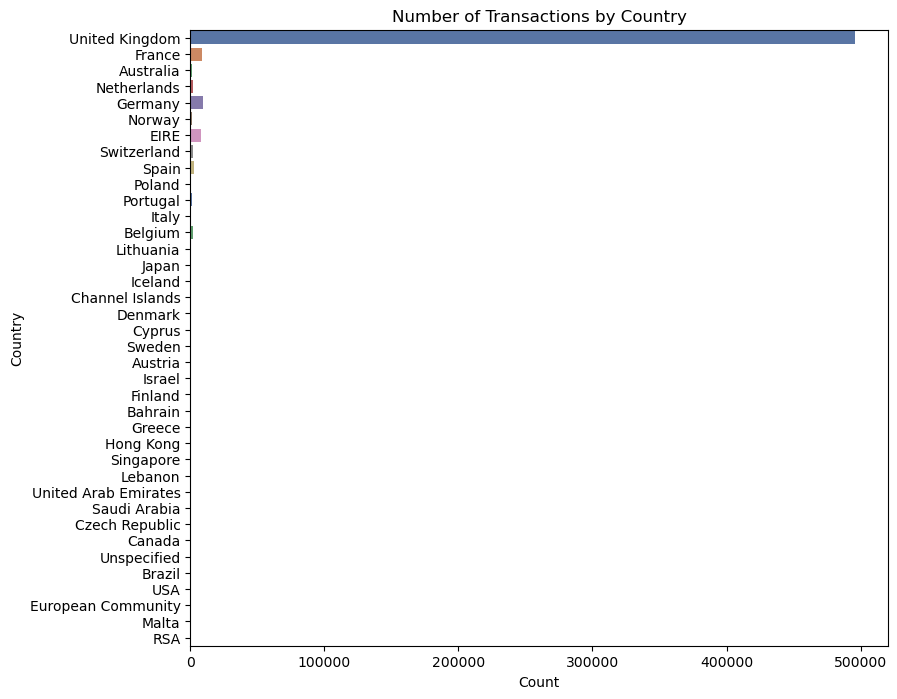

In [9]:
plt.figure(figsize=(9,8))
sns.countplot(data=df, y='Country', palette='deep')
plt.xlabel('Count')
plt.ylabel('Country') 
plt.title('Number of Transactions by Country')
plt.show()


## Data preparation

In [10]:
print("Information of data :")
print("Total Row \t\t:", df.shape[0]) 
print("Total Column \t\t:", df.shape[1]) 
print("Date range from \t:", df.InvoiceDate.min(), " to ", df.InvoiceDate.max())
print("#Invoice No. \t\t:", df.InvoiceNo.nunique())
print("#Unique Customer \t:", df.CustomerID.nunique())
print("Range Quantity \t\t:", df.Quantity.min(), " to ", df.Quantity.max())
print("Range UnitPrice \t:", df.UnitPrice.min(), " to ", df.UnitPrice.max())

Information of data :
Total Row 		: 541909
Total Column 		: 8
Date range from 	: 2010-12-01 08:26:00  to  2011-12-09 12:50:00
#Invoice No. 		: 25900
#Unique Customer 	: 4372
Range Quantity 		: -80995  to  80995
Range UnitPrice 	: -11062.06  to  38970.0


In [11]:
print(df.isnull().sum().sort_values(ascending=False))

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64


In [12]:
df_new = df.dropna()
df_new = df_new[df_new.Quantity > 0]
df_new = df_new[df_new.UnitPrice > 0]

In [13]:
print(df_new.isnull().sum().sort_values(ascending=False))

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [14]:
df_new['Revenue'] = df_new['Quantity'] * df_new['UnitPrice']
df_new['CustomerID'] = df_new['CustomerID'].astype('int64')

## RFM Analysis

In [15]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [16]:
rfmTable = df_new.groupby(['CustomerID'],as_index=False).agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Revenue': 'Monetary'}, inplace=True)

In [17]:
rfmTable.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,18,73,1757.55
4,12350,310,17,334.40


In [18]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
segmented_rfm = rfmTable

In [19]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [20]:
segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
0,12346,325,1,77183.60,1,1,4
1,12347,2,182,4310.00,4,4,4
2,12348,75,31,1797.24,2,2,4
3,12349,18,73,1757.55,3,3,4
4,12350,310,17,334.40,1,1,2


In [21]:
segmented_rfm['RFM_Segement'] = segmented_rfm.r_quartile.map(str)+segmented_rfm.f_quartile.map(str)+segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Segement
0,12346,325,1,77183.60,1,1,4,114
1,12347,2,182,4310.00,4,4,4,444
2,12348,75,31,1797.24,2,2,4,224
3,12349,18,73,1757.55,3,3,4,334
4,12350,310,17,334.40,1,1,2,112


In [22]:
segmented_rfm['RFM_Score'] = segmented_rfm[['r_quartile','f_quartile','m_quartile']].sum(axis=1)
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Segement,RFM_Score
0,12346,325,1,77183.60,1,1,4,114,6
1,12347,2,182,4310.00,4,4,4,444,12
2,12348,75,31,1797.24,2,2,4,224,8
3,12349,18,73,1757.55,3,3,4,334,10
4,12350,310,17,334.40,1,1,2,112,4


### Top 5 Customer based on RFMScore


In [23]:
top_customer = df_new[df_new['CustomerID'] == 14646]
top_customer.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,2010-12-20 10:09:00,0.29,14646,Netherlands,3.48
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,2010-12-20 10:09:00,0.29,14646,Netherlands,3.48
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2010-12-20 10:09:00,4.95,14646,Netherlands,9.90
37955,539491,21931,JUMBO STORAGE BAG SUKI,1,2010-12-20 10:09:00,1.95,14646,Netherlands,1.95
37956,539491,22613,PACK OF 20 SPACEBOY NAPKINS,2,2010-12-20 10:09:00,0.85,14646,Netherlands,1.70


In [24]:
data = segmented_rfm.copy()

In [25]:
data.head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Segement,RFM_Score
0,12346,325,1,77183.60,1,1,4,114,6
1,12347,2,182,4310.00,4,4,4,444,12
2,12348,75,31,1797.24,2,2,4,224,8
3,12349,18,73,1757.55,3,3,4,334,10
4,12350,310,17,334.40,1,1,2,112,4


## Preprocessing data for Clustering
In the next section, we are going to prepare the data for Kmeans clustering on RFM Score data. To do this, we need to preprocess the data so that it can meet the key assumptions of Kmeans algorithm, which are:

The varaiables should be distributed symmetrically
Variables should have similar average values
Variables should have similar standard deviation values[link text](https://)

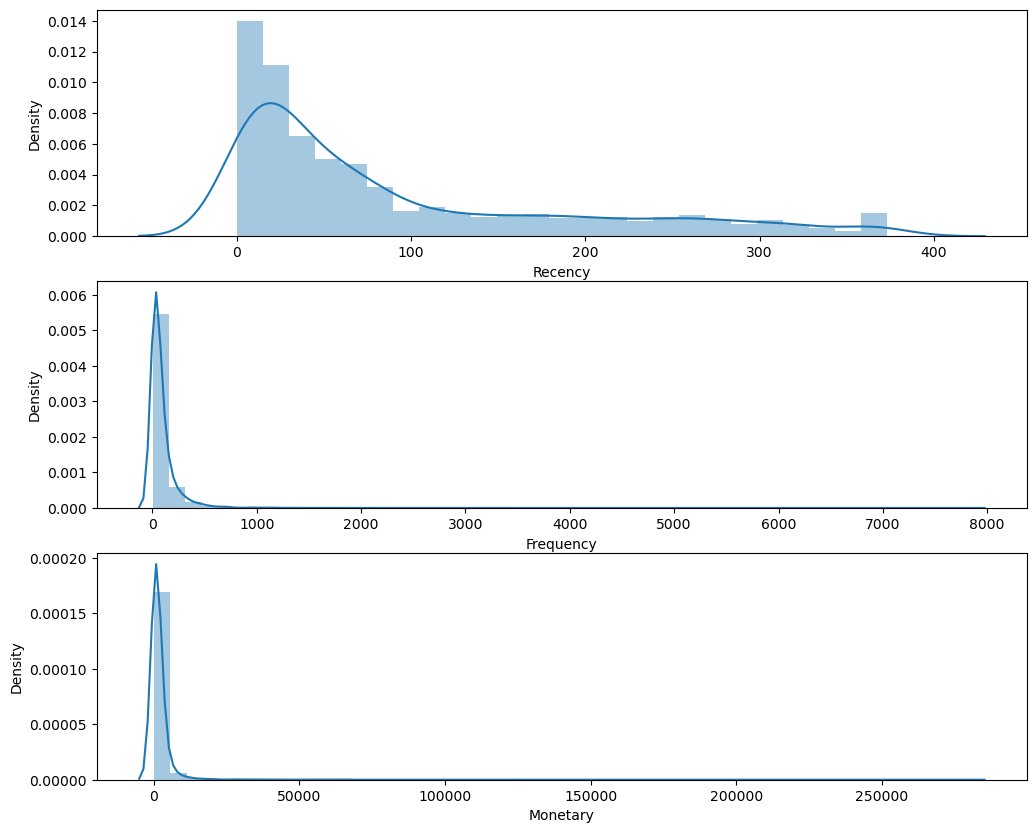

In [26]:
plt.figure(figsize=(12,10))

plt.subplot(3, 1, 1); sns.distplot(data['Recency'])

plt.subplot(3, 1, 2); sns.distplot(data['Frequency'])

plt.subplot(3, 1, 3); sns.distplot(data['Monetary'])

plt.show()


As we can see from the above plots, all the variables do not have a symmetrical distribution. All of them are skewed to the right. To remove the skewness, we can try the following transformations:

log transformations
Box-Cox transformations
Cube root transformations
The log transformation cannot be used for negative values. One common practice one can use here is to add a constant value to get a positive value and this is generally taken as the absolute of the least negative value of the variable to each observation. However, in our data, we do not have any negative values since we are dealing with customer transactions dataset.

In [27]:
data[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.059474,91.720609,2054.266460
std,100.012264,228.785094,8989.230441
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,307.415000
50%,50.000000,41.000000,674.485000
75%,141.750000,100.000000,1661.740000
max,373.000000,7847.000000,280206.020000


In [28]:
data.dtypes

CustomerID        int64
Recency           int32
Frequency         int64
Monetary        float64
r_quartile        int64
f_quartile        int64
m_quartile        int64
RFM_Segement     object
RFM_Score         int64
dtype: object

In [29]:
data[data['Recency'] == 0]

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Segement,RFM_Score
61,12423,0,125,1859.31,4,4,4,444,12
71,12433,0,420,13375.87,4,4,4,444,12
137,12518,0,124,2056.89,4,4,4,444,12
144,12526,0,71,1316.66,4,3,3,433,10
258,12662,0,230,3849.78,4,4,4,444,12
271,12680,0,52,862.81,4,3,3,433,10
297,12713,0,38,848.55,4,2,3,423,9
326,12748,0,4595,33719.73,4,4,4,444,12
489,12985,0,76,1239.38,4,3,3,433,10
550,13069,0,425,4436.12,4,4,4,444,12


In [30]:
data.head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Segement,RFM_Score
0,12346,325,1,77183.60,1,1,4,114,6
1,12347,2,182,4310.00,4,4,4,444,12
2,12348,75,31,1797.24,2,2,4,224,8
3,12349,18,73,1757.55,3,3,4,334,10
4,12350,310,17,334.40,1,1,2,112,4


In [31]:
data = data[data['Recency'] > 0]
data.reset_index(drop=True,inplace=True)

In [32]:
data.head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Segement,RFM_Score
0,12346,325,1,77183.60,1,1,4,114,6
1,12347,2,182,4310.00,4,4,4,444,12
2,12348,75,31,1797.24,2,2,4,224,8
3,12349,18,73,1757.55,3,3,4,334,10
4,12350,310,17,334.40,1,1,2,112,4


In [33]:
raw_data = data[['Recency','Frequency','Monetary']]
data_log = np.log(raw_data)

scaler = StandardScaler()
scaler.fit(data_log)

data_normalized = scaler.transform(data_log)

data_norm = pd.DataFrame(data=data_log, index=raw_data.index, columns=raw_data.columns)


In [34]:
data_norm.head()

,Recency,Frequency,Monetary
0,5.783825,0.000000,11.253942
1,0.693147,5.204007,8.368693
2,4.317488,3.433987,7.494007
3,2.890372,4.290459,7.471676
4,5.736572,2.833213,5.812338


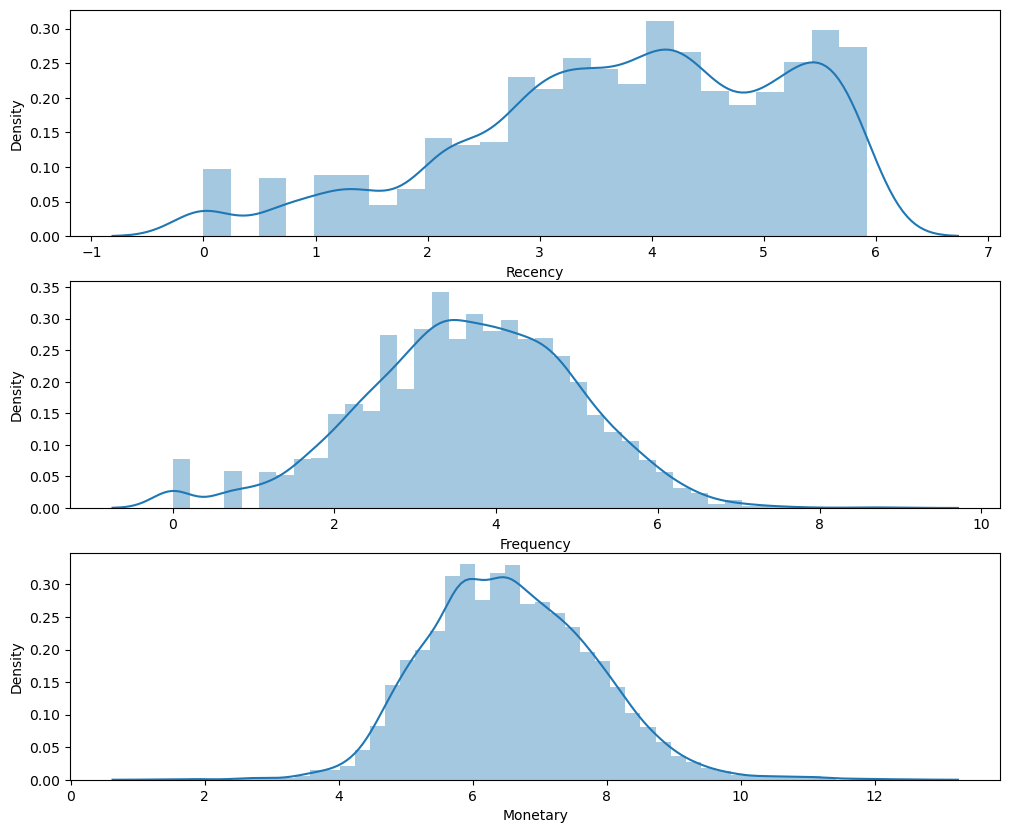

In [35]:
plt.figure(figsize=(12,10))

plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])

plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])

plt.subplot(3, 1, 3); sns.distplot(data_norm['Monetary'])

plt.show()

# Model Building

In [36]:
from sklearn.cluster import KMeans

In [37]:
sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_norm)
    sse[k] = kmeans.inertia_

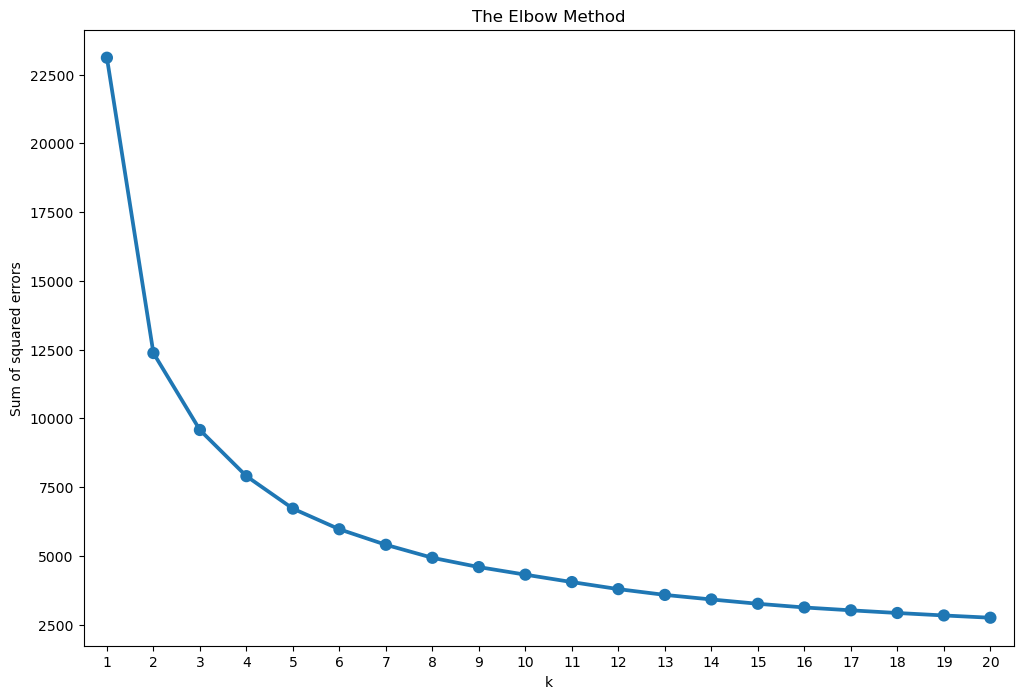

In [38]:
plt.figure(figsize=(12,8))

plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [39]:
kmeans = KMeans(n_clusters=3, random_state=1)

kmeans.fit(data_norm)

cluster_labels = kmeans.labels_

In [40]:
data_norm_k3 = data_norm.assign(Cluster = cluster_labels)
data_k3 = raw_data.assign(Cluster = cluster_labels)

summary_k3 = data_k3.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': ['mean', 'count'],}).round(0)

summary_k3

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          69.0      69.0   1228.0  1820
1         175.0      15.0    303.0  1502
2          11.0     241.0   5597.0   981

In [41]:

kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_norm)

cluster_labels = kmeans.labels_

In [42]:
data_norm_k4 = data_norm.assign(Cluster = cluster_labels)
data_k4 = raw_data.assign(Cluster = cluster_labels)
summary_k4 = data_k4.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': ['mean', 'count'],}).round(0)

summary_k4

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         200.0      16.0    316.0  1293
1          10.0     261.0   6094.0   867
2          84.0      86.0   1581.0  1337
3          24.0      29.0    466.0   806

In [43]:
data_norm_k4.index = data['CustomerID'].astype(int)

In [44]:
data_norm_k4.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,5.783825,0.000000,11.253942,2
12347,0.693147,5.204007,8.368693,1
12348,4.317488,3.433987,7.494007,2
12349,2.890372,4.290459,7.471676,2
12350,5.736572,2.833213,5.812338,0


In [45]:
data_melt = pd.melt(data_norm_k4.reset_index(),
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'],
                    var_name='Attribute',
                    value_name='Value')

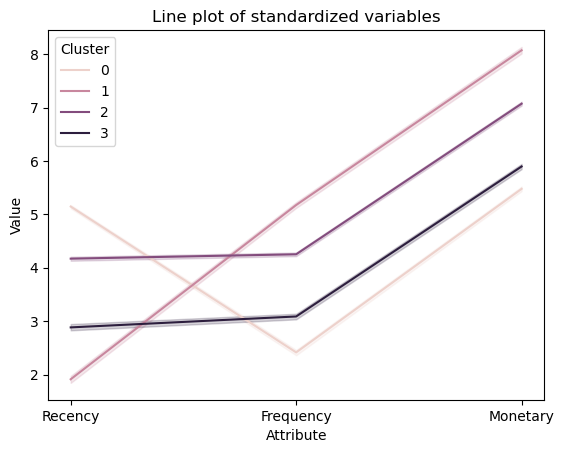

In [46]:
plt.title('Line plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=data_melt)
plt.show()

In [47]:
data_k4.index = data['CustomerID'].astype(int)
data_k4.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,325,1,77183.60,2
12347,2,182,4310.00,1
12348,75,31,1797.24,2
12349,18,73,1757.55,2
12350,310,17,334.40,0


In [48]:
raw_data.index = data['CustomerID'].astype(int)
raw_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40


In [49]:
cluster_avg = data_k4.groupby(['Cluster']).mean()
population_avg = raw_data.head().mean()

In [50]:
cluster_avg

,Recency,Frequency,Monetary
Cluster,,,
0,200.031709,15.711524,315.645059
1,10.372549,260.692042,6094.477220
2,84.166043,85.770381,1580.608080
3,23.808933,28.846154,465.652457


In [51]:
population_avg

Recency        146.000
Frequency       60.800
Monetary     17076.558
dtype: float64

In [52]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,0.37,-0.74,-0.98
1,-0.93,3.29,-0.64
2,-0.42,0.41,-0.91
3,-0.84,-0.53,-0.97


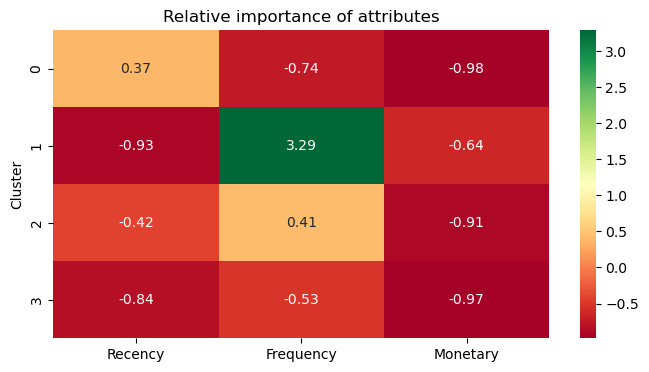

In [53]:
plt.figure(figsize=(8, 4))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()